# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

658

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# OpenWeatherMap API Key
api_key= "4472517849734e43da48fba98e132fae"
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data=[]
print("Beginning Data Retrieval")
print("------------------------")

record_count=1
set_count=1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=rikitea
Processing Record 2 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=qaanaaq
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=punta%20arenas
Processing Record 5 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=hermanus
Processing Record 6 of Set 1 | erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=

Processing Record 2 of Set 2 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=port-cartier
Processing Record 3 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=hambantota
Processing Record 4 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=fortuna
Processing Record 5 of Set 2 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=lorengau
Processing Record 6 of Set 2 | smidovich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=smidovich
Processing Record 7 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=east%20london
Processing Record 8 of Set 2 | ahipara
http://api.openweathermap.org

Processing Record 5 of Set 3 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=plettenberg%20bay
Processing Record 6 of Set 3 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=hobart
Processing Record 7 of Set 3 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=karratha
Processing Record 8 of Set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=mahebourg
Processing Record 9 of Set 3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=bredasdorp
Processing Record 10 of Set 3 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=evensk
Processing Record 11 of Set 3 | okhotsk
http://api.openweathermap.org/dat

Processing Record 9 of Set 4 | abong mbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=abong%20mbang
Processing Record 10 of Set 4 | akyab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=akyab
City not found. Skipping...
Processing Record 11 of Set 4 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=marsh%20harbour
Processing Record 12 of Set 4 | antsohihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=antsohihy
Processing Record 13 of Set 4 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=atuona
Processing Record 14 of Set 4 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=omboue
Processing Record 15 of Set 4 | bajil
http://ap

Processing Record 12 of Set 5 | lake havasu city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=lake%20havasu%20city
Processing Record 13 of Set 5 | katha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=katha
City not found. Skipping...
Processing Record 14 of Set 5 | gigmoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=gigmoto
Processing Record 15 of Set 5 | timmins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=timmins
Processing Record 16 of Set 5 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=guerrero%20negro
Processing Record 17 of Set 5 | camargo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=camargo
Processing Record 18 of Set 5 | 

Processing Record 15 of Set 6 | maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=maningrida
Processing Record 16 of Set 6 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=richards%20bay
Processing Record 17 of Set 6 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=vaitupu
City not found. Skipping...
Processing Record 18 of Set 6 | poplar bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=poplar%20bluff
Processing Record 19 of Set 6 | tucuman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=tucuman
Processing Record 20 of Set 6 | kasamwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=kasamwa
Processing Record 21 of Set 6 | falm

Processing Record 18 of Set 7 | shakawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=shakawe
Processing Record 19 of Set 7 | daund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=daund
Processing Record 20 of Set 7 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=ust-nera
Processing Record 21 of Set 7 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=puerto%20del%20rosario
Processing Record 22 of Set 7 | hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=hokitika
Processing Record 23 of Set 7 | boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=boyolangu
Processing Record 24 of Set 7 | katobu
http://api.openweathermap

Processing Record 22 of Set 8 | moctezuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=moctezuma
Processing Record 23 of Set 8 | sesheke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=sesheke
Processing Record 24 of Set 8 | fuling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=fuling
Processing Record 25 of Set 8 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=rio%20gallegos
Processing Record 26 of Set 8 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=rundu
Processing Record 27 of Set 8 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=isangel
Processing Record 28 of Set 8 | yenagoa
http://api.openweathermap.org/data/2.5/weath

Processing Record 25 of Set 9 | lagunas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=lagunas
Processing Record 26 of Set 9 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=kieta
Processing Record 27 of Set 9 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=lasa
Processing Record 28 of Set 9 | shakiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=shakiso
Processing Record 29 of Set 9 | bairiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=bairiki
City not found. Skipping...
Processing Record 30 of Set 9 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=naze
Processing Record 31 of Set 9 | sidi ali
http://api.openweathermap.org/data/2.5/we

Processing Record 28 of Set 10 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=fort%20nelson
Processing Record 29 of Set 10 | bemidji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=bemidji
Processing Record 30 of Set 10 | luba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=luba
Processing Record 31 of Set 10 | khormuj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=khormuj
City not found. Skipping...
Processing Record 32 of Set 10 | bahia blanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=bahia%20blanca
Processing Record 33 of Set 10 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=flinders
Processing Record 34 of Set 10 | pirapora


Processing Record 31 of Set 11 | san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=san%20andres
Processing Record 32 of Set 11 | kenora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=kenora
Processing Record 33 of Set 11 | trois-rivieres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=trois-rivieres
Processing Record 34 of Set 11 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=klaksvik
Processing Record 35 of Set 11 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=vardo
Processing Record 36 of Set 11 | nedjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=nedjo
Processing Record 37 of Set 11 | chiapilla
http://api.openweathermap.org/d

Processing Record 33 of Set 12 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=fare
Processing Record 34 of Set 12 | moba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=moba
Processing Record 35 of Set 12 | paldiski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=paldiski
Processing Record 36 of Set 12 | azad shahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=azad%20shahr
City not found. Skipping...
Processing Record 37 of Set 12 | laurel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=laurel
Processing Record 38 of Set 12 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=palabuhanratu
City not found. Skipping...
Processing Record 39 of 

City not found. Skipping...
Processing Record 35 of Set 13 | bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=bull%20savanna
Processing Record 36 of Set 13 | griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=griffith
Processing Record 37 of Set 13 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=barcelos
Processing Record 38 of Set 13 | trogir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=trogir
Processing Record 39 of Set 13 | ordzhonikidze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=ordzhonikidze
Processing Record 40 of Set 13 | aksarayskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4472517849734e43da48fba98e132fae&q=aksarayskiy
Processing Record 41 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy", index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          590
Cloudiness    590
Country       590
Date          590
Humidity      590
Lat           590
Lng           590
Max Temp      590
Wind Speed    590
dtype: int64

In [45]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,49,PF,1566089478,68,-23.12,-134.97,70.57,13.56
1,qaanaaq,0,GL,1566089479,77,77.48,-69.36,36.73,3.38
2,punta arenas,0,CL,1566089479,86,-53.16,-70.91,30.20,8.05
3,hermanus,0,ZA,1566089450,85,-34.42,19.24,57.43,15.41
4,erzin,40,TR,1566089479,83,36.95,36.20,82.40,2.84


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

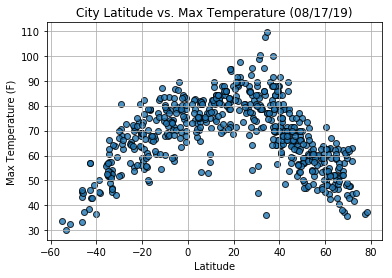

In [47]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output1")

# Show plot
plt.show()

#### Latitude vs. Temperature Plot

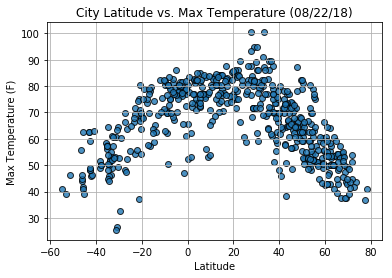

#### Latitude vs. Humidity Plot

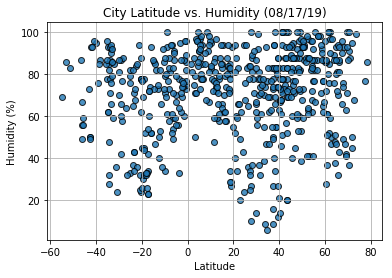

In [48]:
# Build the scatter plots for each city types
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output2")

# Show plot
plt.show()

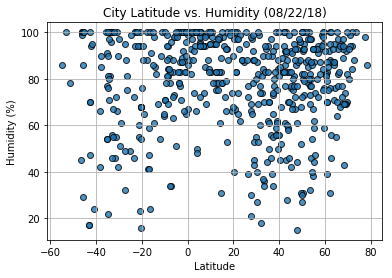

#### Latitude vs. Cloudiness Plot

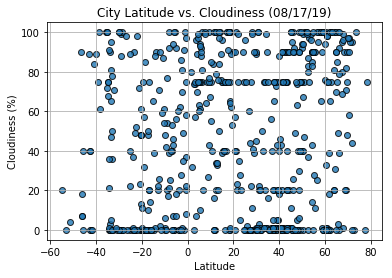

In [49]:
# Build the scatter plots for each city types
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output3")

# Show plot
plt.show()

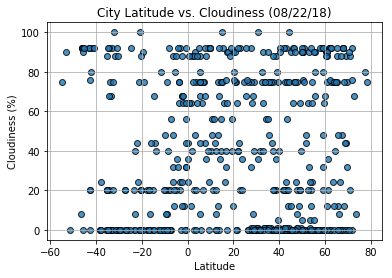

#### Latitude vs. Wind Speed Plot

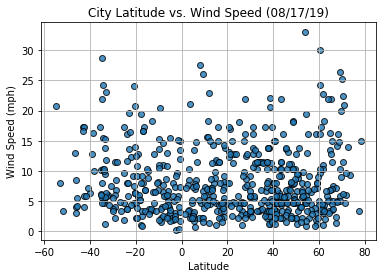

In [50]:
# Build the scatter plots for each city types
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output4")

# Show plot
plt.show()

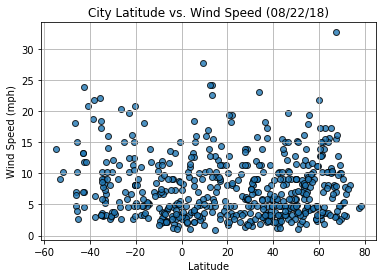